In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip

In [3]:
with open('../00_Resources/all_merged_datasets.csv', 'rb') as fd:
    gzip_fd = gzip.GzipFile(fileobj=fd)
    df = pd.read_csv(gzip_fd)
df = df.sample(frac=1).reset_index(drop=True)
df

,Unnamed: 0,title,text,label
0,50037,Respect Your Cat (Not That It Cares) - The New...,It seems as if there’s always some kind of fel...,True
1,42700,Dennis Kucinich’s Extraordinary Warning on D.C...,"Thursday Oct 27, 2016 \nWAR is a racket. It al...",False
2,48266,Save the Children Norway trialed anti-malaria ...,Save the Children Norway trialed anti-malaria ...,True
3,25658,The conservative case for gay marriage,Led by conservative Justice and Reagan appoint...,True
4,22882,Families of San Bernardino shooting sue Facebo...,LOS ANGELES (Reuters) - Family members of thre...,True
...,...,...,...,...
60287,40451,WORLD WAR 3 Hillary Clinton Foundation Holocau...,source Add To The Conversation Using Facebook ...,False
60288,20958,Clinton Insider Confesses: Trump Protests Are ...,\nThis article was written by SGT Report and o...,False
60289,3171,MINNESOTA CHURCH Places 1800 “Blessed Ramadan”...,Here s the truth about the Somali Muslim popul...,False
60290,53630,OUCH! Leftist Hollywood Just Got Schooled By O...,Here is actor Robert John Davi s brilliant let...,False


In [4]:
# ML libraries
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
# TODO: find out how to CountVectorize a multi-dimensional array.
X = df['text']
y = df['label']

In [9]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X.shape, y.shape)

(60292,) (60292,)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

tfidf_train

<40395x152675 sparse matrix of type '<class 'numpy.float64'>'
	with 7130207 stored elements in Compressed Sparse Row format>

In [8]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df

,00,000,0000,00000017,00000031,000035,0000364334,00004,000048,00006,...,תתרכז,النيرب,عربي,ಠ_ಠ,ยงade,ノhillbro,ㅤㅤㅤ,中文,习氏狼条脊甲,殆ww
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.04545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40390,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40391,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40392,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40393,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Create a support vector machine linear classifer and fit it to the training data
model = SVC(C=1.0, kernel='linear', gamma=0.0001, probability=True)
model.fit(tfidf_train, y_train)

# Print the model score using the test data
# print(model.score(tfidf_train, y_train))
# print(model.score(tfidf_test, y_test))
pred = model.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

In [19]:
# Calculate the classification report
from sklearn.metrics import classification_report
pred = model.predict(tfidf_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.89      0.89      0.89     10321
        True       0.88      0.88      0.88      9576

    accuracy                           0.88     19897
   macro avg       0.88      0.88      0.88     19897
weighted avg       0.88      0.88      0.88     19897



In [20]:
model = SVC(C=50, kernel='rbf', gamma=0.005)
model.fit(tfidf_train, y_train)

# Print the model score using the test data
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))
pred = model.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.9245946280480257
0.8820425189727095
accuracy:   0.882
f1 score:   0.878


In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, f1_score

linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(linear_clf.score(tfidf_train, y_train))
print(linear_clf.score(tfidf_test, y_test))
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.9971036019309321
0.9417500125647082
accuracy:   0.942
f1 score:   0.939


In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.84842
Alpha: 0.10 Score: 0.86742
Alpha: 0.20 Score: 0.87018
Alpha: 0.30 Score: 0.87058
Alpha: 0.40 Score: 0.87164
Alpha: 0.50 Score: 0.87119
Alpha: 0.60 Score: 0.87073
Alpha: 0.70 Score: 0.87144
Alpha: 0.80 Score: 0.87209
Alpha: 0.90 Score: 0.87199


In [23]:
clf = MultinomialNB(alpha=0.8)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(clf.score(tfidf_train, y_train))
print(clf.score(tfidf_test, y_test))
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.902166109667038
0.8720912700407096
accuracy:   0.872
f1 score:   0.864


1
3
5
7
9
11
13
15
17
19


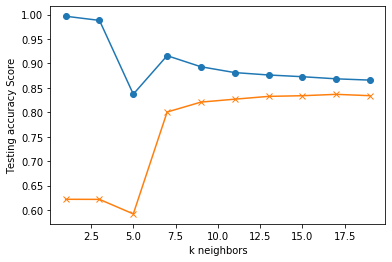

In [24]:
# Fit KNN model with tfidf and chart results
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(tfidf_train, y_train)
    train_score = model.score(tfidf_train, y_train)
    test_score = model.score(tfidf_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(k)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(tfidf_train, y_train)
pred = model.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.8763708379749969
0.8325878273106498
accuracy:   0.833
f1 score:   0.826


In [49]:
# save model using joblib
import joblib
filename = '../05_Models/fake_title_SVM_model.sav'
joblib.dump(model, filename)

['../05_Models/fake_title_SVM_model.sav']

In [13]:
X = test_df['title']
y = test_df['label']

# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Get training feature names
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Create a support vector machine linear classifer and fit it to the training data
# model = SVC(C=1.0, kernel='linear', gamma=0.0001)
model.fit(tfidf_train, y_train)

# Print the model score using the test data
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))

# Calculate the classification report
preds = model.predict(tfidf_test)
print(classification_report(y_test, preds))

0.9634778510838832
0.8010521281683405
              precision    recall  f1-score   support

       False       0.81      0.80      0.81      1071
        True       0.79      0.80      0.80      1020

    accuracy                           0.80      2091
   macro avg       0.80      0.80      0.80      2091
weighted avg       0.80      0.80      0.80      2091



In [51]:
preds = model.predict(tfidf_test)


,00,000,0000,00004,000063,00042,0009,000938,000american,000have,...,zzjjpdaivn,zzn3bqnfsk,zzpx_bzka40police,zzqvyk8xif,zzsg90pbf6,zztaine,zzuml4hkoc,zzzzaaaacccchhh,zzzzzzzz,émigré
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.030085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30076,0.000000,0.116148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30077,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30078,0.185293,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30079,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# save model using joblib
import joblib
filename = '../05_Models/fake_body_SVM_model.sav'
joblib.dump(model, filename)

In [ ]:
X = df['text']
y = df['label']

print('1')

# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('2')

# A pipeline for the text model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

from sklearn.svm import SVC
model = SVC(C=1.0, kernel='linear', gamma=0.0001, probability=True)
pipeline = make_pipeline(vectorizer, model)

print('3')

# Fit vectorizer and model
pipeline.fit(X_train, y_train)

print('4')

from sklearn.metrics import classification_report, accuracy_score, f1_score
# Print model score
pred = pipeline.predict(X_test)

print('5')

acc_score = accuracy_score(y_test, pred)

print('6')

f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

print('7')

# save model using joblib
import joblib
filename = '../05_Models/combined_body_SVM_linear_pipeline.sav'
joblib.dump(pipeline, filename)

1
2
3


In [13]:
X = df['text']
y = df['label']

# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
# A pipeline for the text model
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
model = PassiveAggressiveClassifier()
pipeline = make_pipeline(vectorizer, model)

# Fit vectorizer and model
pipeline.fit(X_train, y_train)

# Print model score
pred = pipeline.predict(X_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

import joblib
filename = '../05_Models/combined_body_PAC_pipeline.sav'
joblib.dump(pipeline, filename)

accuracy:   0.940
f1 score:   0.937


['../05_Models/combined_body_PAC_pipeline.sav']